<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EB%B3%B5%EC%8A%B5_%EC%9D%B4%EA%B0%80%EC%98%8141_1103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결측치를 어떻게 처리할 것인가?
- 대체 혹은 제거

- 머신러닝식으로 해결하면서 학습시키면 다 된다라는 관점은 매우 위험하다
- 결측값처리시에는 도메인적 지식이 결합되어야한다. 결측치인 이유 고려 등이 필요하다.
- 이번에 배울 내용은 수치적이니 접근. 도메인 고려가 항상 우선시 되어야한다.
- 사용불가능한 결측값은 대부분 제거

1. MCAR : 다른변수와 관련없는 애들  => 결측처리하면됨
2. MAR : 무작위 변수. 변수 특성에 따라 판단이 달라짐
  - 다른 변수에 특성 따라서 결측치가 체계적으로 발생하는 경우
  - VIP 고객이라면 특정컬럼값에 구매에 대한 VIP적립금 추가 -> 기존 VIP 추가컬럼은 Na,
3. MNAR
  - 비무작위 결측치
  - 결측치자체가 특성을 갖는 경우. 비회원, 서베이 응답 중 꺼려지는 응답을 하지 않는 경우 (소득, 연봉 등)

- 선형보완 (listwise / dropping entire rows)
- 컬럼제거
- pairwise deletions

- Knn Based 알고리즘
- MICE : 오차항 확률 다중대치법
- 몬테칼르로, 결측치


## Interpolation (보간법)

- 내삽. 특정한 두 점 안쪽에 놓여있는 가능한 값을 구하려는 방법

- 보외법(Extrapolation) : 외삽. 범위를 넘어서 다른 변수와의 관계에 기초하여 변수의 값을 추정하는 방법

- SKLearn impute

# 코드

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=04b32f968c2cf009ebd1f2d6d347d82569481498cefbba7ecbd9060b91ba688f
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=196d81f5bc101ea54a57f998730b6d5e7be1d291380b0e0c28750d01792da217
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [ ]:
##결측값을 대치하는 방법들은 다양하지만 우선은 기본적인 것들만 살펴보면서
##결측값을 대치하는 방법들의 차이를 이해하는 것을 학습의 목표로 생각하고 바라보자!
np.random.seed(0)
data= np.random.normal(10,2,100)

df = pd.DataFrame(data, columns= ['feature'])
df_sp= df.copy()

In [ ]:
# nan은 numpy import 필요. df만 결측값 nan으로 처리하면 무슨일이 생기나
df.loc[5:10, 'feature'] = np.nan
df.loc[30:35, 'feature'] = np.nan
df.loc[40:55, 'feature'] = np.nan

In [ ]:
df_sp

,feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
...,...
95,11.413146
96,10.021000
97,13.571741
98,10.253824


In [ ]:
df

,feature
0,13.528105
1,10.800314
2,11.957476
3,14.481786
4,13.735116
...,...
95,11.413146
96,10.021000
97,13.571741
98,10.253824


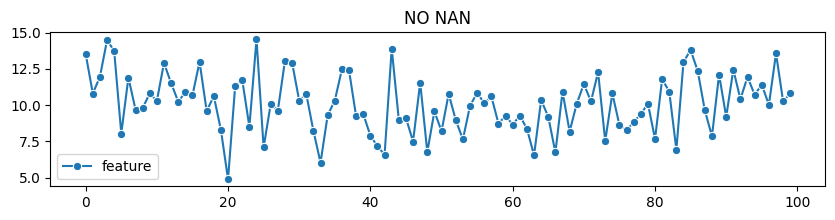

In [ ]:
# na를 어떻게 대치해야하나?
plt.figure(figsize = (10,2))
sns.lineplot(data= df_sp, marker = 'o')
plt.title("NO NAN")
plt.show()

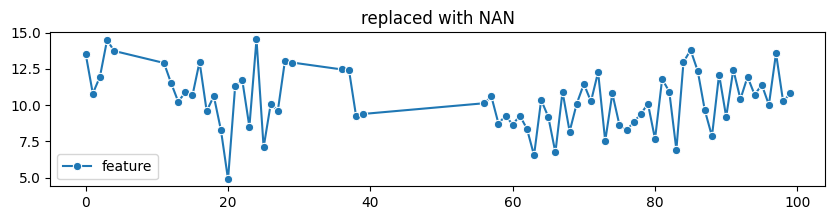

In [ ]:
#데이터 원본(결측제거) 데이터 시각화
plt.figure(figsize=(10,2))
sns.lineplot(data= df, marker='o')
plt.title('replaced with NAN')
plt.show()

In [ ]:

# 1. 1차 선형보간법, 데이터프레임.interpolate()
df_linear = df.interpolate(method= 'linear')


# 2. 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method= 'quadratic')



# 3. 평균대치법 sklearn 패키지를 사용
imputer_mean = SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns=['feature'])



# 4. 0값으로 대치 fillna() na값에 특정 값을 넣겠다.
df_zero = df.fillna(0)


# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors = 3)
df_knn =imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns = ['feature'])



# 6. MICE 다중대치법
mice_imputer =IterativeImputer()
df_mice =mice_imputer.fit_transform(df)
df_mice =pd.DataFrame(df_mice, columns=['feature'])

In [ ]:
# 1. 1차 선형보간법, 데이터프레임.interpolate()
df_linear = df.interpolate(method= 'linear')

# 2. 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method= 'quadratic')

# 3. 평균대치법 sklearn 패키지를 사용
imputer_mean = SimpleImputer(strategy='mean')
df_mean =imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns=['feature'])

# 4. 0값으로 대치 fillna() na값에 특정 값을 넣겠다.
df_zero = df.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors = 3)
df_knn =imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns = ['feature'])

# 6. MICE 다중대치법
mice_imputer =IterativeImputer()
df_mice =mice_imputer.fit_transform(df)
df_mice =pd.DataFrame(df_mice, columns=['feature'])


Text(0.5, 1.0, 'df_mice')

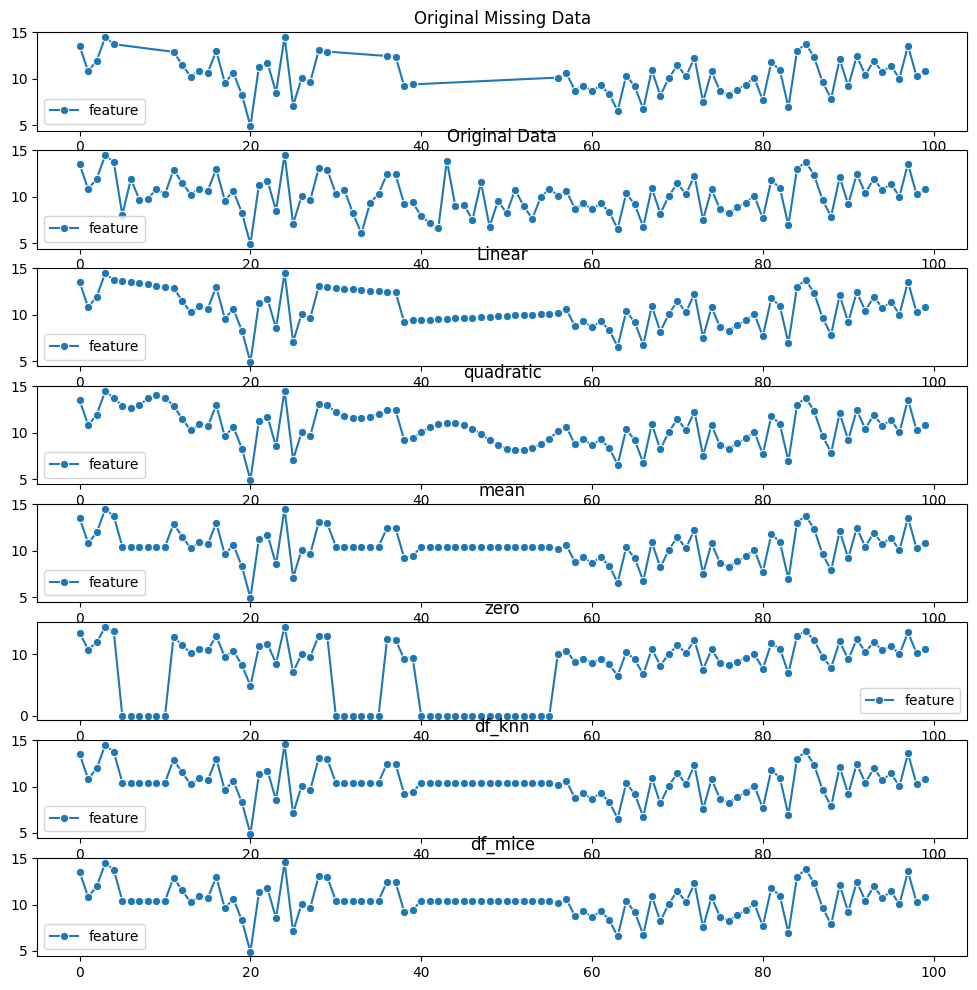

In [ ]:
# 시각화로 어떤 식으로 대치가 되었는지 살펴보자!

fig, axs = plt.subplots(8,1,figsize=(12,12))
sns.lineplot(data= df, marker='o',ax=axs[0], legend='auto')
axs[0].set_title('Original Missing Data')

sns.lineplot(data= df_sp, marker='o',ax=axs[1], legend='auto')
axs[1].set_title('Original Data')

sns.lineplot(data= df_linear, marker='o',ax=axs[2], legend='auto')
axs[2].set_title('Linear')

sns.lineplot(data= df_quadratic, marker='o',ax=axs[3], legend='auto')
axs[3].set_title('quadratic')

sns.lineplot(data= df_mean, marker='o',ax=axs[4], legend='auto')
axs[4].set_title('mean')

sns.lineplot(data= df_zero, marker='o',ax=axs[5], legend='auto')
axs[5].set_title('zero')

sns.lineplot(data= df_knn, marker='o',ax=axs[6], legend='auto')
axs[6].set_title('df_knn')

sns.lineplot(data= df_mice, marker='o',ax=axs[7], legend='auto')
axs[7].set_title('df_mice')